In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier

In [2]:
mnist= fetch_openml('mnist_784',as_frame=False)
x, y = mnist['data'], mnist['target']

In [3]:
type(x)

numpy.ndarray

In [4]:
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import matplotlib

In [7]:
s= x[3001]
z=s.reshape(28,28)

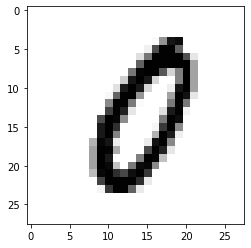

In [8]:
plt.imshow(z,cmap= matplotlib.cm.binary,interpolation="nearest")

In [9]:
y[3001]

'0'

In [10]:
x_train= x[:60000]
x_test=x[60000:]

In [11]:
y_train= y[:60000]
y_test=y[60000:]

In [12]:
ar= np.random.permutation(60000)

In [13]:
x_train, y_train= x_train[ar], y_train[ar]

In [14]:
y_train2=(y_train=='9').astype(np.int_)

In [15]:
y_test2=(y_test=='9').astype(np.int_)

In [16]:
y_train2

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
clf= KNeighborsClassifier()

In [18]:
clf.fit(x_train,y_train2)

KNeighborsClassifier()

In [19]:
clf.predict([s])

array([0])

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
a= cross_val_score(clf,x_train,y_train2,cv=3, scoring="accuracy")

In [22]:
a.mean()

0.9910333333333333

In [23]:
from sklearn.model_selection import cross_val_predict

In [24]:
y_train_pred= cross_val_predict(clf,x_train,y_train2,cv=3)

In [25]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_train2,y_train_pred)

array([[53752,   299],
       [  239,  5710]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score, recall_score

In [29]:
precision_score(y_train2,y_train_pred)


0.9502413047096022

In [30]:
recall_score(y_train2,y_train_pred)

0.9598251807026391

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_train2,y_train_pred)

0.9550091988626861